In [1]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from matplotlib import style
from collections import Counter
import pickle
import random
style.use('fivethirtyeight')

In [12]:
# Preparing Data
df = pd.read_csv('Feature_all_optomized.csv')

# define train and test data
# X = np.array(df.drop(['class'], 1)) # put every thing in array except 'class' label
Y = np.array(df['class'])  # array have 'class' only
fil = open('GaussianRandomProjection.pickle', 'rb')
X = pickle.load(fil)
fil.close()
# split data in train and test groups
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4)

# implementing the k-nearest neighbors classifier
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
# classifier_f = open('KN_algo.pickle','wb')
# pickle.dump(clf, classifier_f)
# classifier_f.close()    
# test the accuracy of algorithm|
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.857142857143


In [5]:
# save classifier
classifier_f = open('KN_algo.pickle','wb')
pickle.dump(clf, classifier_f)
classifier_f.close()    

In [ ]:
# make a prediction

ex_measure = np.array([0.185655,157.536530,123.564873,13242.350111,0.566160,52.502389,0.430877, 0.653675,1.391882,5.375214])
# print(ex_measure)
        
ex_measure = ex_measure.reshape(1, -1)
# print(ex_measure)
prediction = clf.predict(ex_measure)

print(prediction)

## SVM Classifier

In [14]:
# implementing the svm classifier
clf1 = svm.SVC()
clf1.fit(x_train,y_train)

# test the accuracy of algorithm
accuracy = clf1.score(x_test, y_test)
print(accuracy)

0.857142857143


In [56]:
# save classifier
classifier_f = open('SVM.pickle','wb')
pickle.dump(clf1, classifier_f)
classifier_f.close()    

In [36]:
ex_measure = np.array([0.185655,157.536530,123.564873,13242.350111,0.566160,52.502389,0.430877, 0.653675,1.391882,5.375214])
# print(ex_measure)
        
ex_measure = ex_measure.reshape(1, -1)
# print(ex_measure)
prediction = clf1.predict(ex_measure)

print(prediction)

[1]


## KMeans

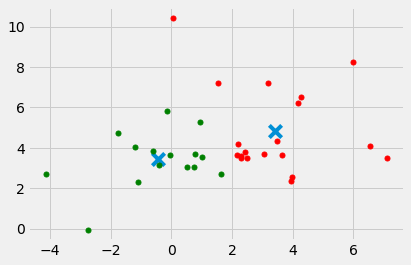

In [15]:
clf =  KMeans(n_clusters =2)
clf.fit(X)
centroids = clf.cluster_centers_
labels = clf.labels_

colors =10* ["g.", "r.","c.","b.","k."]

for i in range(len(X)):
    plt.plot(X[i][0] , X[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:,0],centroids[:,1], marker='x', s=150, linewidths=5)
plt.show()

In [20]:
# data = preprocessing.scale(X)
data = X
clf = KMeans(n_clusters=2)
clf.fit(data)
# print(clf)

correct = 0
for i in range(len(data)):
    predict_me = np.array(data[i].astype(float))
    predict_me = predict_me.reshape(-1 , len(predict_me))
    #     print(predict_me)
    prediction = clf.predict(predict_me)
    if prediction[0] == Y[i]:
        correct +=1
        
print(correct / float(len(X)))

0.529411764706


In [57]:
# save classifier
classifier_f = open('Kmean.pickle','wb')
pickle.dump(clf, classifier_f)
classifier_f.close()    

In [5]:
# new data with Feature Reduction

fil = open('pca_trans_data.pickle', 'rb')
data = pickle.load(fil)
fil.close()

In [21]:
clf = KMeans(n_clusters=2)
clf.fit(data)
# print(clf)

correct = 0
for i in range(len(data)):
    predict_me = np.array(data[i].astype(float))
    predict_me = predict_me.reshape(-1 , len(predict_me))
    #     print(predict_me)
    prediction = clf.predict(predict_me)
    if prediction[0] == Y[i]:
        correct +=1
        
print(correct / float(len(X)))

0.470588235294


In [15]:
fil = open('y.pickle', 'rb')
Y = pickle.load(fil)
fil.close()
x_train, x_test, y_train, y_test = train_test_split(data, Y, test_size = 0.3)
# implementing the k-nearest neighbors classifier
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
classifier_f = open('KN_algo.pickle','wb')
pickle.dump(clf, classifier_f)
classifier_f.close()    
# test the accuracy of algorithm|
accuracy = clf.score(x_test, y_test)
print(accuracy)

1.0


In [22]:
# implementing the svm classifier
clf1 = svm.SVC()
clf1.fit(x_train,y_train)

# test the accuracy of algorithm
accuracy = clf1.score(x_test, y_test)
print(accuracy)

0.857142857143
